In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pyyaml==5.3.1
!pip install -U torch==1.7.1+cu101 torchvision==0.8.2+cu101 torchaudio==0.7.2 -f https://download.pytorch.org/whl/cu101/torch_stable.html 

import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
!gcc --version


import torch
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!git clone https://github.com/facebookresearch/detectron2


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 269 kB 14.6 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86_64.whl size=44636 sha256=f140d353c815cdc81a3f0ccb536267d2caac74418bf20e4aa7d13cb295feb6b7
  Stored in directory: /root/.cache/pip/wheels/5e/03/1e/e1e954795d6f35dfc7b637fe2277bff021303bd9570ecea653
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/cu101/torch_stable.html
     |████████████████████████████████| 735.4 MB 15 kB/s 
     |████████████████████████████████| 12.8 MB 566 kB/s 
     |████████████████████████████████| 7.6 MB 13.8 MB/s 
  Attempting uninstall: torch
    Found existing instal

Cloning into 'detectron2'...
remote: Enumerating objects: 14560, done.
remote: Counting objects: 100% (33/33), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 14560 (delta 11), reused 16 (delta 6), pack-reused 14527
Receiving objects: 100% (14560/14560), 5.96 MiB | 7.84 MiB/s, done.
Resolving deltas: 100% (10521/10521), done.


In [1]:

import cv2
from tqdm import tqdm
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

from pycocotools.coco import COCO
from pycocotools import mask as mutils

from detectron2.data.datasets import register_coco_instances
from detectron2.data import DatasetMapper, build_detection_test_loader
from detectron2.engine import DefaultTrainer
from LossEvalHook import LossEvalHook 
import os
import json
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor

import torch
from detectron2.utils.visualizer import ColorMode
from detectron2.utils.visualizer import Visualizer
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import matplotlib.patches as patches
 
from detectron2 import model_zoo
import random
from detectron2.data import MetadataCatalog
from detectron2.data.catalog import DatasetCatalog
import iopath
from detectron2.evaluation import COCOEvaluator, inference_on_dataset



In [ ]:
!nvidia-smi

Sat Oct  8 09:45:28 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# #@title Calculate bbox and save new coco json

# root_dir = '/content/drive/MyDrive/InstanceSegmentation/Dataset/dataverse_files/'
# annotations_dir = 'annotations_EVICAN2/'

# json_files = os.listdir(root_dir+annotations_dir)
# for path in json_files:
#   path = root_dir+annotations_dir+path
#   f = open(path)
#   anns = json.load(f)
#   coco=COCO(path)
#   # convert masks to annotations
#   for i in range(len(anns['annotations'])):
#     bbox = list(map(int,mutils.toBbox(coco.annToRLE(anns['annotations'][i])).tolist()))
#     anns['annotations'][i]['bbox'] = bbox
#     anns['annotations'][i]['area'] = bbox[2]*bbox[3]

#   with open(path.split('.')[0]+'_bbox.json', 'w') as f:
#     json.dump(anns, f)



In [ ]:
#@title Calculate 'bbox' and 'area', storing and display

ann = anns['annotations'][10]
print(ann)
ann['bbox'] = mutils.toBbox(coco.annToRLE(ann)).tolist()
images_path = '/content/drive/MyDrive/InstanceSegmentation/Dataset/dataverse_files/Images/EVICAN_train2019/11_769p.jpg'
image = Image.open(images_path)
 
fig, ax = plt.subplots()
 
# Draw boxes and add label to each box
# for ann in anns:
box = ann['bbox']
bb = patches.Rectangle((box[0],box[1]), box[2],box[3], linewidth=2, edgecolor="blue", facecolor="none")
ax.add_patch(bb)
 
ax.imshow(image)
plt.show()

NameError: ignored

In [2]:
#@title Loading out Evican2 COCO Dataset 


root_dir = '/content/drive/MyDrive/InstanceSegmentation/Dataset/dataverse_files/'
annotations_dir = 'annotations_EVICAN2/'

register_coco_instances("my_dataset_train", {}, root_dir+annotations_dir+"instances_train2019_EVICAN2_bbox.json", root_dir+'Images/EVICAN_train2019')
register_coco_instances("my_dataset_val", {}, root_dir+annotations_dir+"instances_val2019_EVICAN2_bbox.json", root_dir+'Images/EVICAN_val2019')
register_coco_instances("my_dataset_eval", {}, root_dir+annotations_dir+"instances_eval2019_medium_EVICAN2_bbox.json", root_dir+'Images/EVICAN_eval2019')

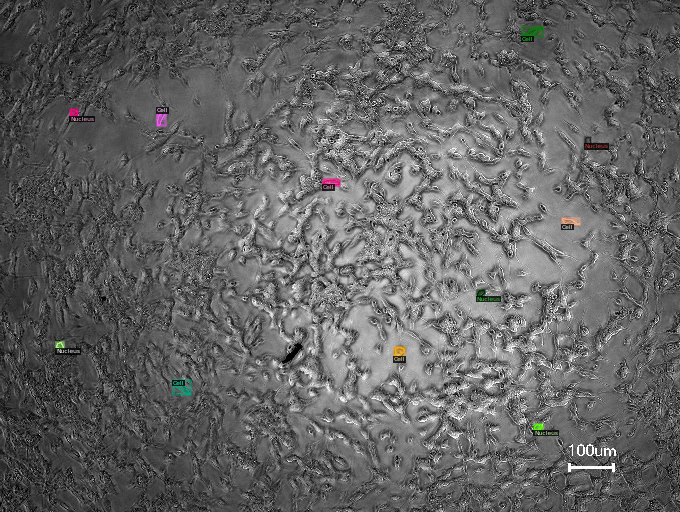

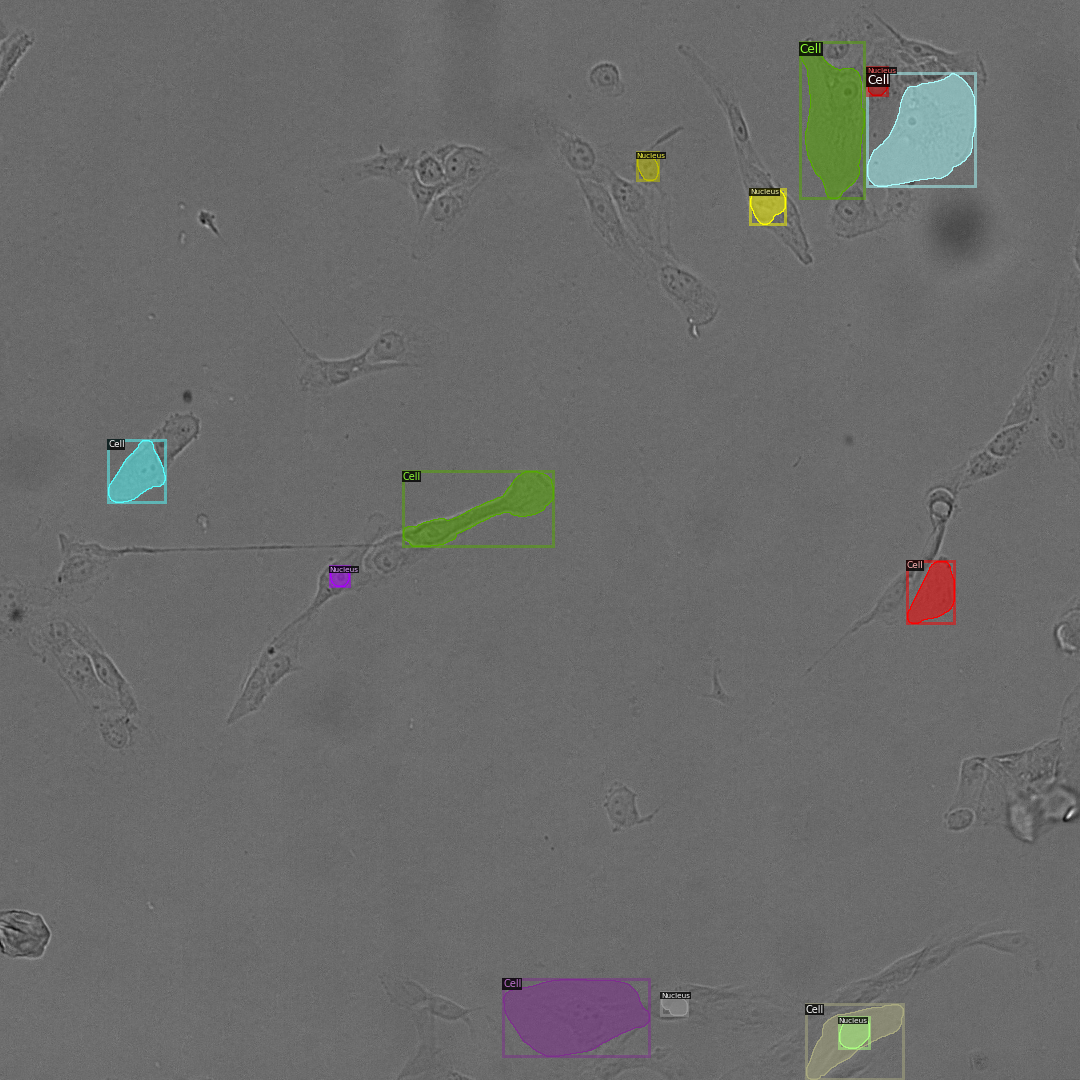

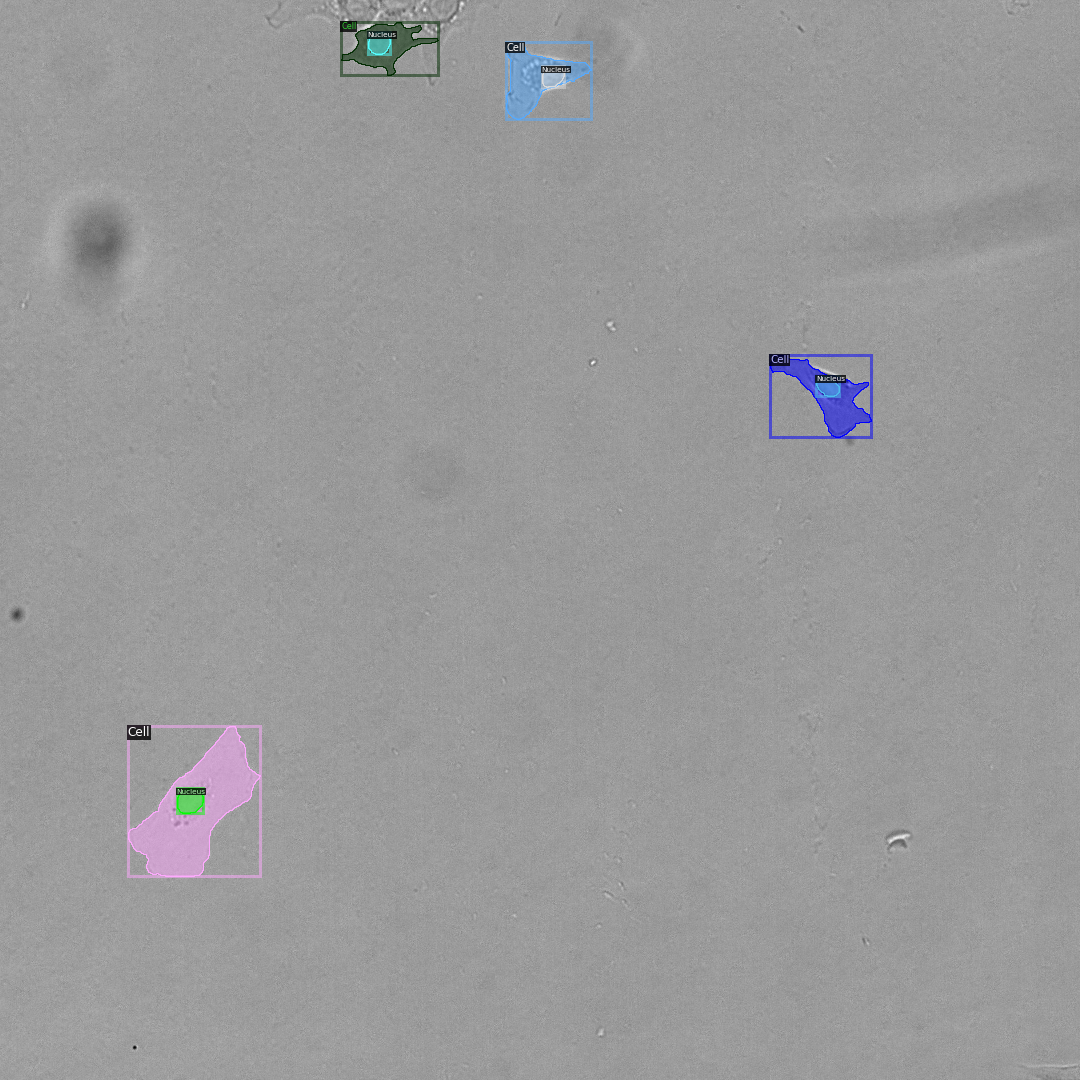

In [ ]:


my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")


for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [3]:
#@title Creating our own custom Detectron2 Trainer to log Validation Loss


class CustomTrainer(DefaultTrainer):
    """
    Custom Trainer deriving from the "DefaultTrainer"
    Overloads build_hooks to add a hook to calculate val loss on the val set during training.
    """

    def build_hooks(self):
        hooks = super().build_hooks()
        hooks.insert(-1, LossEvalHook(
            100, # Frequency of calculation - every 100 iterations here
            self.model,
            build_detection_test_loader(
                self.cfg,
                self.cfg.DATASETS.TEST[0],
                DatasetMapper(self.cfg, True)
            )
        ))

        return hooks

In [ ]:
#@title Traaining model on EVICAN2 COCO Dataset


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml")


cfg.OUTPUT_DIR = "/content/drive/MyDrive/InstanceSegmentation/output/"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05  # set the testing threshold for this model
cfg.TEST.EVAL_PERIOD = 200

# Solver options
cfg.SOLVER.CHECKPOINT_PERIOD = 500
cfg.SOLVER.BASE_LR = 0.00025           # Base learning rate
cfg.SOLVER.GAMMA = 0.5              # Learning rate decay
cfg.SOLVER.STEPS = (250, 500, 750)  # Iterations at which to decay learning rate
cfg.SOLVER.MAX_ITER = 3000          # Maximum number of iterations
cfg.SOLVER.WARMUP_ITERS = 100       # Warmup iterations to linearly ramp learning rate from zero
cfg.SOLVER.IMS_PER_BATCH = 2

trainer = CustomTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[10/10 08:15:59 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_a3ec72.pkl: 254MB [08:13, 515kB/s]                            
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


[10/10 08:24:24 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/structures/masks.py:363: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  item = item.nonzero().squeeze(1).cpu().numpy().tolist()
/usr/local/lib/python3.7/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:103: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/

[10/10 08:25:05 d2.utils.events]:  eta: 0:51:07  iter: 19  total_loss: 4.617  loss_cls: 0.887  loss_box_reg: 0.09939  loss_mask: 0.6905  loss_rpn_cls: 2.514  loss_rpn_loc: 0.5056  time: 1.0288  data_time: 1.5472  lr: 4.7703e-05  max_mem: 2920M
[10/10 08:25:25 d2.utils.events]:  eta: 0:47:12  iter: 39  total_loss: 2.086  loss_cls: 0.5209  loss_box_reg: 0.05401  loss_mask: 0.6695  loss_rpn_cls: 0.4688  loss_rpn_loc: 0.401  time: 0.9870  data_time: 0.4240  lr: 9.7653e-05  max_mem: 2993M
[10/10 08:25:44 d2.utils.events]:  eta: 0:47:01  iter: 59  total_loss: 1.686  loss_cls: 0.1967  loss_box_reg: 0.06811  loss_mask: 0.6339  loss_rpn_cls: 0.3998  loss_rpn_loc: 0.3777  time: 0.9780  data_time: 0.4210  lr: 0.0001476  max_mem: 3229M
[10/10 08:26:04 d2.utils.events]:  eta: 0:46:42  iter: 79  total_loss: 1.69  loss_cls: 0.2  loss_box_reg: 0.08618  loss_mask: 0.568  loss_rpn_cls: 0.3462  loss_rpn_loc: 0.4823  time: 0.9775  data_time: 0.4598  lr: 0.00019755  max_mem: 3229M
[10/10 08:35:58 d2.utils.

In [11]:
#@title Loading model for Evaluation on Eval/Test Dataset 

cfg = get_cfg()
cfg.OUTPUT_DIR = "/content/drive/MyDrive/InstanceSegmentation/detectron2/"
os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)


cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_101_FPN_3x.yaml"))
cfg.DATASETS.TEST = ("my_dataset_eval",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = '/content/drive/MyDrive/InstanceSegmentation/output/model_0001499.pth'
cfg.INPUT.MAX_SIZE_TEST = 20000
cfg.SOLVER.IMS_PER_BATCH = 2   # increase this for more speed, but it will need more vram
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 4096   # or 128 for example
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2 

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.05  # set the testing threshold for this model

predictor = DefaultPredictor(cfg)

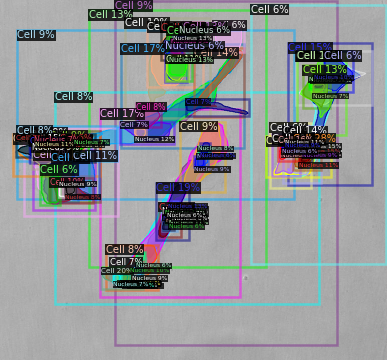

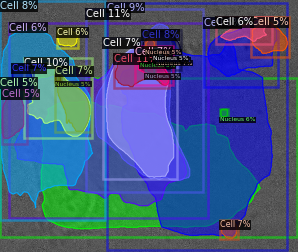

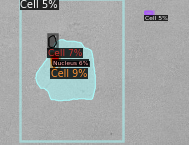

In [6]:
#@title Visualizing the test results on test/eval images

my_dataset_train_metadata = MetadataCatalog.get("my_dataset_eval")
dataset_dicts = DatasetCatalog.get("my_dataset_eval")

cnt = 0 
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    outputs = predictor(img)
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    # vis = visualizer.draw_dataset_dict(d)
    vis = visualizer.draw_instance_predictions(outputs["instances"].to("cpu"))
    cv2_imshow(vis.get_image()[:, :, ::-1])
    cv2.imwrite(str(cnt)+".jpg", vis.get_image()[:, :, ::-1])
    cnt +=1

In [12]:
#@title Evaluating model on Eval/Test Dataset 

evaluator = COCOEvaluator("my_dataset_eval", cfg, False, output_dir="output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_eval")
inference_on_dataset(predictor.model, val_loader, evaluator)

Loading and preparing results...
DONE (t=0.00s)
creating index...
index created!
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.191
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.067
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.074
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.107
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.035
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.149
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.209
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.

OrderedDict([('bbox',
              {'AP': 8.27838550532221,
               'AP50': 19.064338609848434,
               'AP75': 5.4552592675710425,
               'APs': 6.65826255438331,
               'APm': 7.406952698543893,
               'APl': 10.728879580563838,
               'AP-Cell': 14.785245684926915,
               'AP-Nucleus': 1.7715253257175065}),
             ('segm',
              {'AP': 7.238759495947616,
               'AP50': 17.033271683145895,
               'AP75': 4.928627141751027,
               'APs': 4.582755681800958,
               'APm': 6.086512349108413,
               'APl': 10.435617754103598,
               'AP-Cell': 12.431407526278623,
               'AP-Nucleus': 2.0461114656166126})])

In [ ]:
!python --version


In [ ]:
# !pip freeze